<a href="https://colab.research.google.com/github/aslla77/opencv/blob/main/OpenCV_CNN_mk2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist

In [76]:
cnn=load_model('/content/drive/MyDrive/MODEL_CV.h5')

(x_train,t_train),(x_test,t_test)=mnist.load_data()

x_test=x_test/255.
x_test.shape

(10000, 28, 28)

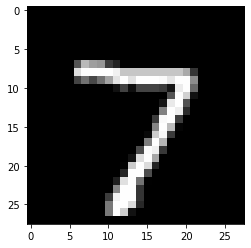

7


In [77]:
plt.imshow(x_test[0],cmap='gray')
plt.show()

pred=cnn.predict(np.array([x_test[0]]))
print(np.argmax(pred))

In [78]:
def resizeimg(img_blur,rects):
  img_class=img_blur.copy()

  mnist_imgs=[]
  margin_pixel=0

  for rect in rects:
    x,y,w,h=rect[0],rect[1],rect[2],rect[3]
    im=img_class[y-margin_pixel:y+h+margin_pixel,
                x-margin_pixel:x+w+margin_pixel]
    row,col=im.shape[:2]

    #정방향 비율을 맞추기
    bordersize=max(row,col)
    diff=min(row,col)

    bottom=im[row-2:row,0:col]
    mean=cv2.mean(bottom)[0]

    border=cv2.copyMakeBorder(
        im,
        top=0,
        bottom=0,
        left=int((bordersize-diff)/2),
        right=int((bordersize-diff)/2),
        borderType=cv2.BORDER_CONSTANT,
        value=[mean,mean,mean]

    )
    square=border
    resized_img=cv2.resize(square,dsize=(28,28),
                          interpolation=cv2.INTER_AREA)
    mnist_imgs.append(resized_img)
  return mnist_imgs

In [79]:
def firstdata(img1):

  img_gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

  img_blur= cv2.GaussianBlur(img_gray,(5,5),0)

  ret,img_th=cv2.threshold(img_blur,170,255,cv2.THRESH_BINARY_INV)

  contours,hierachy=cv2.findContours(img_th.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

  rects=[cv2.boundingRect(each) for each in contours]

  rects=sorted(rects)

  return img_th,rects

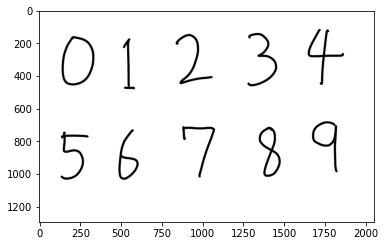

In [80]:
filename2='/content/drive/MyDrive/IMG_EEC1E1604FE8-1.jpeg'
img2=cv2.imread(filename2)
plt.imshow(img2)
plt.show()


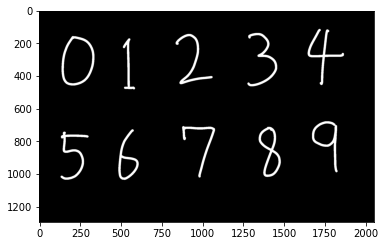

In [81]:
imgblur1,rests1=firstdata(img2)
plt.imshow(imgblur1,cmap='gray')
plt.show()
mnist_imgs1=resizeimg(imgblur1,rests1)

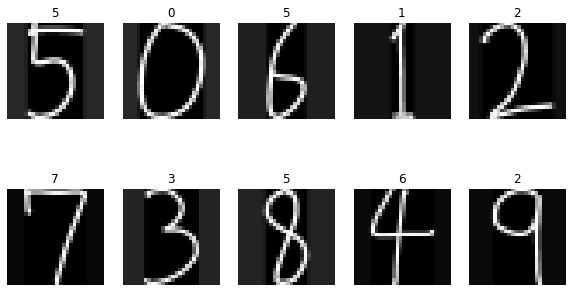

In [86]:
plt.figure(figsize=(10,30))

for i in range(len(mnist_imgs1)):
  img=mnist_imgs1[i]
  plt.subplot(10,5,i+1)
  plt.imshow(img,cmap='gray')

  img=img.reshape(-1,28,28,1)

  input_data_=((np.array(img)/255)-1)*-1
  res=np.argmax(cnn.predict(input_data_))
  title_str = res
  plt.axis('off')
  plt.title(title_str)
  
plt.show()

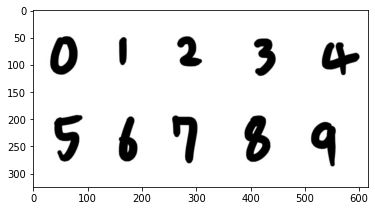

In [90]:
filename3='/content/drive/MyDrive/IMG_0022.jpg'
img3=cv2.imread(filename3)
plt.imshow(img3,cmap='gray')
plt.show()
imgblur3,rests3=firstdata(img3)
mnist_imgs3=resizeimg(imgblur3,rests3)

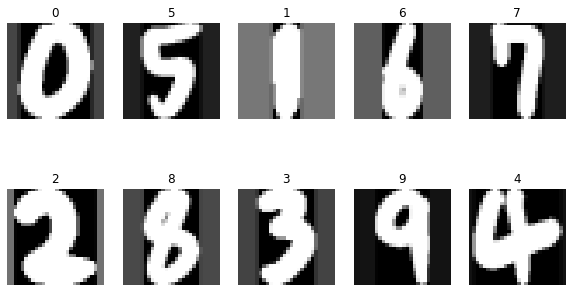

In [91]:
plt.figure(figsize=(10,30))

for i in range(len(mnist_imgs3)):
  img=mnist_imgs3[i]
  plt.subplot(10,5,i+1)
  plt.imshow(img,cmap='gray')

  img=img.reshape(-1,28,28,1)

  input_data_=((np.array(img)/255))
  res=np.argmax(cnn.predict(input_data_))
  title_str = res
  plt.axis('off')
  plt.title(title_str)
  
plt.show()